<a href="https://colab.research.google.com/github/mimrancomsats/ProgrammingforAI_SPRING25/blob/main/Lab_13_BERT_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis (Text Classification)**
*   **Text Cleaning**
*   **BERT Model (Feature Engineering)**
*   **DL Model**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.1


In [ ]:
!pip install -U "tensorflow-text==2.14.*"

# **Importing Preprocessing Libraries**

In [ ]:
#!pip install --quiet tensorflow_text

!pip install contractions

import pandas as pd
import string

import re
import contractions
import nltk
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer


#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('punkt_tab')


#stopwords.words('english')

# **Reading Data**

In [ ]:
temp_df = pd.read_csv('/content/drive/MyDrive/Programming for AI_SPRING-25/Labs/IMDB Dataset.csv')
df = temp_df.iloc[:1000]

# **Text Cleaning & Preprocessing**

In [ ]:
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

def remove_contractions(text):
  expanded_text = contractions.fix(text)
  return expanded_text

def remove_punc(text):
    unwanted = set(string.punctuation + string.digits)
    return ''.join(char for char in str(text) if char not in unwanted)


In [ ]:
df['review'] = df['review'].str.lower()

df['review'] = df['review'].apply(remove_html_tags)

df['review'] = df['review'].apply(remove_url)

#df['review'] = df['review'].apply(remove_contractions)

#df['review'] = df['review'].apply(remove_punc)

#df['review'] = df['review'].apply(word_tokenize)

#df['review'] = df['review'].apply(remove_stopwords)

#df['review'] = df['review'].apply(lemmatize_words)

<ipython-input-15-1f3dc379276c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.lower()
<ipython-input-15-1f3dc379276c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_html_tags)
<ipython-input-15-1f3dc379276c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

# **Feature Engineering**

**Target Column Encoding**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.preprocessing import LabelEncoder

X = df['review']
Y = df['sentiment']
#print(X)
#print(Y)

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

#print(Y)

X_train,X_test,y_train,y_test = train_test_split(df['review'],Y,test_size=0.2,random_state=42)
print(X_train)
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

29     'war movie' is a hollywood genre that has been...
535    this film is really vile. it plays on the urba...
695    okay this is stupid,they say their not making ...
557    crossfire remains one of the best hollywood me...
836    this film was very well advertised. i am an av...
                             ...                        
106    the performance of every actor and actress (in...
270    clifton webb is one of my favorites. however, ...
860    this production was quite a surprise for me. i...
435    you wear only the best italian suits from arma...
102    i bought this game on an impulse buy from walm...
Name: review, Length: 800, dtype: object
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


**Finetuning using Deep Learning**

In [ ]:
preprocessor = hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")
encoder = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/4",trainable=True)


text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
#print (text_input)
print(type(text_input))
encoder_inputs = preprocessor(text_input)
#print(encoder_inputs)
#print(type(encoder_inputs))
outputs = encoder(encoder_inputs)
#print(outputs)
#print(type(outputs))
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
#print(pooled_output)

#drop_out = tf.keras.layers.Dropout(0.2,name='dropout')(pooled_output)
#hidden = tf.keras.layers.Dense(256, activation='relu', name='hidden_layer')(pooled_output)
output = tf.keras.layers.Dense(1,activation='sigmoid')(pooled_output)

model=tf.keras.Model(inputs=[text_input],outputs=[output])

<class 'keras.src.engine.keras_tensor.KerasTensor'>


In [ ]:
# Compile the model using SGD (Stochastic Gradient Descent)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train using batch_size = 1 for stochastic updates
history = model.fit(X_train, y_train, epochs=5, batch_size=1, validation_split=0.1)

Epoch 1/5
 2/23 [=>............................] - ETA: 10:11 - loss: 0.7842 - accuracy: 0.4375

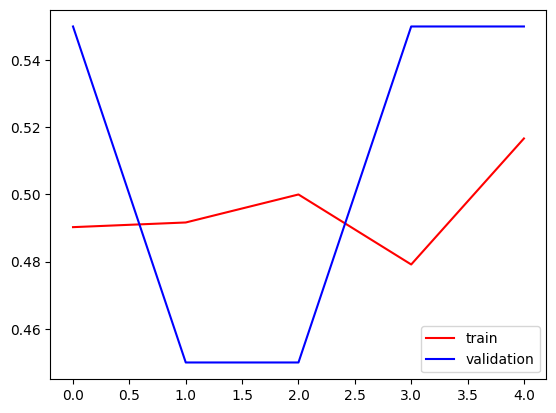

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()